In [153]:
import os

data = {
    'unincluded': {},
    'included_1': {},
    'included_2': {}
}

parent_dir = os.path.dirname(os.getcwd()).rstrip("\\/") + '/chosen_problems_st3-3_as3-3_at1_v1'
no_question_files = [entry for entry in os.listdir(f'{parent_dir}/_feedback_results') if entry.endswith('.ini')]
question_files1 = [entry for entry in os.listdir(f'{parent_dir}/_feedback_results_include_question') if entry.endswith('.ini')]
question_files2 = [entry for entry in os.listdir(f'{parent_dir}/_feedback_results_include_question2') if entry.endswith('.ini')]


def add_data(path, data_set):
    global data
    
    filename = file.split('/')[-1].split('\\')[-1]
    data[data_set][filename] = {}
    
    # Only works with gpt-4-0613
    # Next time add this data to the ini [global] section
    filename_tokens = filename.split('-')
    data[data_set][filename]['_temp'] = float(filename_tokens[4])
    data[data_set][filename]['_top_p'] = float(filename_tokens[6])
    data[data_set][filename]['_trial'] = float(filename_tokens[7].split('.')[0])
    
    with open(path, encoding='utf-8') as ini_file:
        line_num = 0
        assignment = ''
        student = ''
        for line in ini_file.readlines():
            line_num += 1
            if line.startswith('[global]'):
                continue
            if line.startswith('[') and '.' not in line:
                assignment = line.strip('[]\n')
                data[data_set][filename][assignment] = {}
                continue
            elif line.startswith('[') and '.' in line:
                student = line.split('.')[1].split('_')[0]
                data[data_set][filename][assignment][student] = {}
                continue
            
            if len(assignment) == len(student) == 0:
                continue
            
            if line.startswith('instructor_feedback'):
                parts = [i.strip() for i in line.split('=')]
                try:
                    data[data_set][filename][assignment][student][parts[0]] = max(1, min(int(parts[1]), 5))  # clamp to 1-5 inclusive
                except (IndexError, ValueError):
                    print(f'Missing value for {parts[0]} at line {line_num} in {file}')


for file in no_question_files:
    add_data(f'{parent_dir}/_feedback_results/{file}', 'unincluded')

for file in question_files1:
    add_data(f'{parent_dir}/_feedback_results_include_question/{file}', 'included_1')

for file in question_files2:
    add_data(f'{parent_dir}/_feedback_results_include_question2/{file}', 'included_2')

Missing value for instructor_feedback_gpt_sentiment at line 222 in gpt-4-0613-temp-0.0-top_p-0.0-2.ini
Missing value for instructor_feedback_gpt_sentiment at line 270 in gpt-4-0613-temp-1.0-top_p-0.0-2.ini
Missing value for instructor_feedback_gpt_sentiment at line 604 in gpt-4-0613-temp-1.0-top_p-0.0-2.ini
Missing value for instructor_feedback_gpt_clear at line 1709 in gpt-4-0613-temp-0.0-top_p-0.0-2.ini
Missing value for instructor_feedback_pedal_sentiment 5 at line 2528 in gpt-4-0613-temp-0.0-top_p-0.0-2.ini
Missing value for instructor_feedback_gpt_accurate at line 1262 in gpt-4-0613-temp-0.0-top_p-1.0-0.ini
Missing value for instructor_feedback_gpt_concise at line 1263 in gpt-4-0613-temp-0.0-top_p-1.0-0.ini
Missing value for instructor_feedback_gpt_clear at line 1264 in gpt-4-0613-temp-0.0-top_p-1.0-0.ini
Missing value for instructor_feedback_gpt_jargon at line 1265 in gpt-4-0613-temp-0.0-top_p-1.0-0.ini
Missing value for instructor_feedback_gpt_sentiment at line 1266 in gpt-4-061

In [154]:
from copy import deepcopy

data_fields = ('accurate', 'concise', 'clear', 'jargon', 'sentiment')
data_points = {
    'instructor_feedback_gpt_accurate': [],
    'instructor_feedback_gpt_concise': [],
    'instructor_feedback_gpt_clear': [],
    'instructor_feedback_gpt_jargon': [],
    'instructor_feedback_gpt_sentiment': [],
    'instructor_feedback_pedal_accurate': [],
    'instructor_feedback_pedal_concise': [],
    'instructor_feedback_pedal_clear': [],
    'instructor_feedback_pedal_jargon': [],
    'instructor_feedback_pedal_sentiment': []
}

student_data_aggregate_blank = {
    'Beedrill': deepcopy(data_points),
    'Buizel': deepcopy(data_points),
    'Darumaka': deepcopy(data_points),
    'Elgyem': deepcopy(data_points),
    'Girafarig': deepcopy(data_points),
    'Lapras': deepcopy(data_points),
    'Liepard': deepcopy(data_points),
    'Nosepass': deepcopy(data_points),
    'Nuzleaf': deepcopy(data_points)
}
student_data_aggregate = {
    'unincluded': deepcopy(student_data_aggregate_blank),
    'included_1': deepcopy(student_data_aggregate_blank),
    'included_2': deepcopy(student_data_aggregate_blank)
}

assignment_data_aggregate_blank = {
    'bakery_intro_programs_code_try_blockpy': deepcopy(data_points),
    'bakery_structures_lists_code_emptiness': deepcopy(data_points),
    'bakery_structures_lists_code_book_list': deepcopy(data_points),
    'bakery_intro_import_code_import_variable': deepcopy(data_points),
    'bakery_advanced_plotting_code_basic_scatter': deepcopy(data_points),
    'bakery_functions_flow_code_timely_extraction': deepcopy(data_points),
    'bakery_if_patterns_make_pig_latin': deepcopy(data_points),
    'bakery_nesting_list_dataclasses_code_good_job': deepcopy(data_points),
    'bakery_for_composition_code_highest_filter': deepcopy(data_points)
}
assignment_data_aggregate = {
    'unincluded': deepcopy(assignment_data_aggregate_blank),
    'included_1': deepcopy(assignment_data_aggregate_blank),
    'included_2': deepcopy(assignment_data_aggregate_blank)
}

all_data_aggregate = {
    'unincluded': deepcopy(data_points),
    'included_1': deepcopy(data_points),
    'included_2': deepcopy(data_points)
}

for data_set in data.keys():
    for filename, file in data[data_set].items():
        for assignment_name, assignment in file.items():
            if assignment_name.startswith('_'):
                continue
            for student_name, student in assignment.items():
                for score_category, score in student.items():
                    student_data_aggregate[data_set][student_name][score_category].append(score)
                    assignment_data_aggregate[data_set][assignment_name][score_category].append(score)
                    all_data_aggregate[data_set][score_category].append(score)

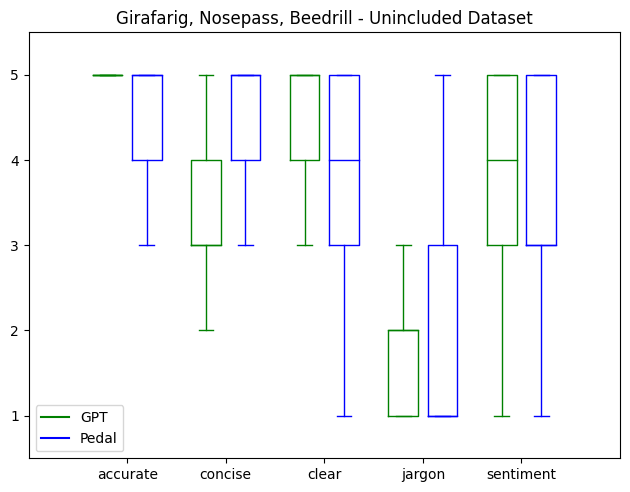

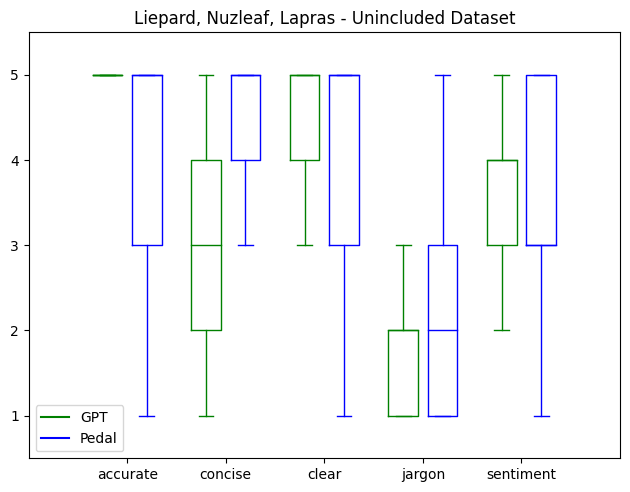

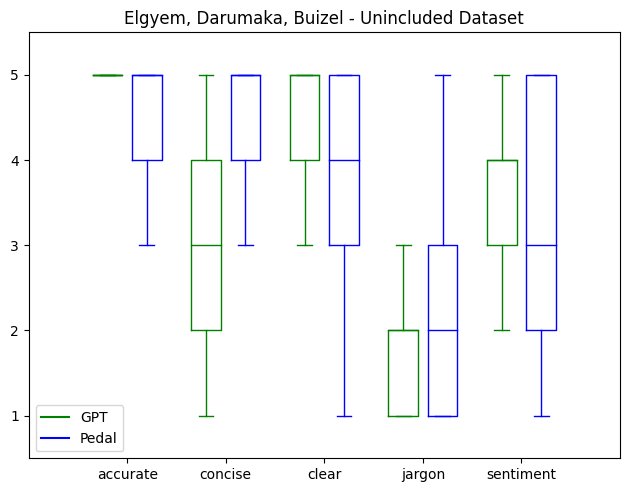

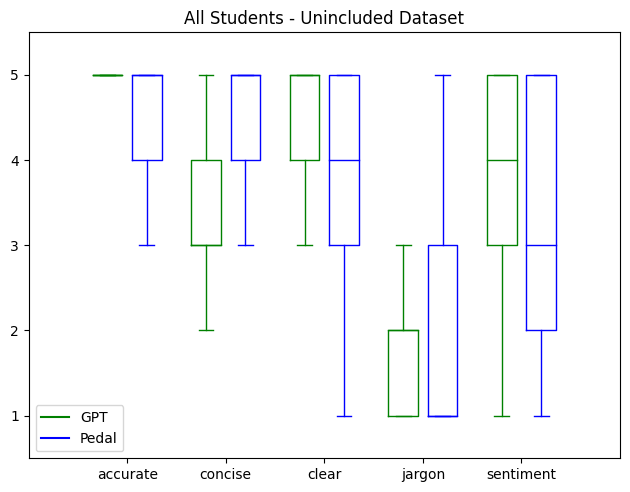

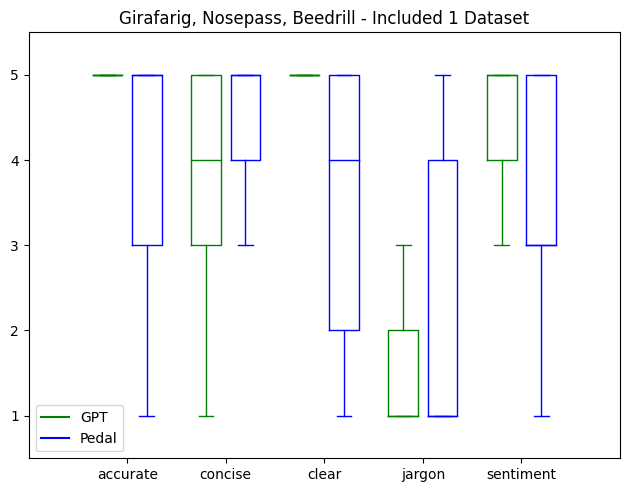

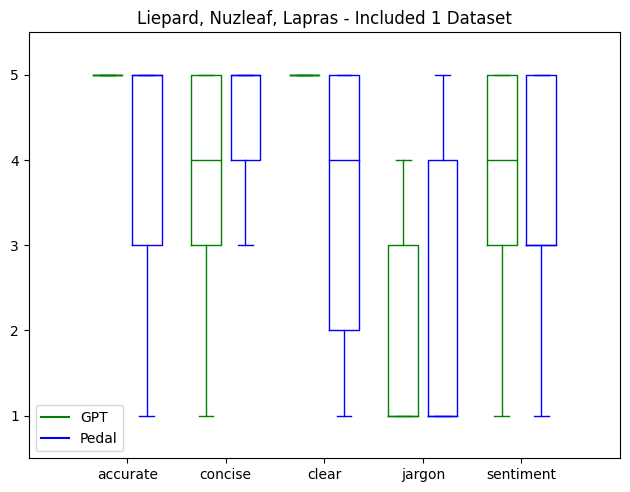

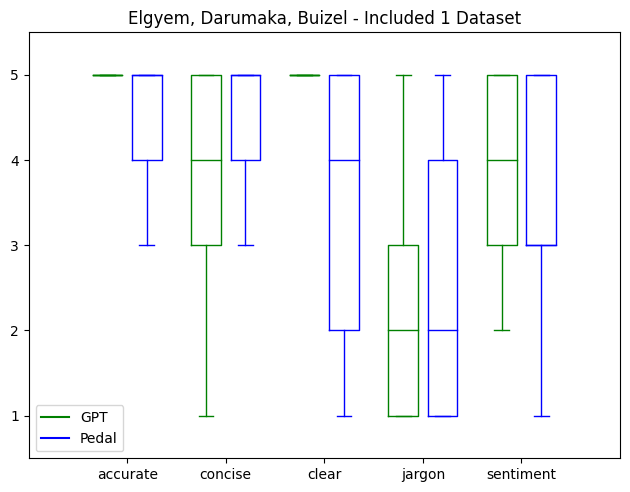

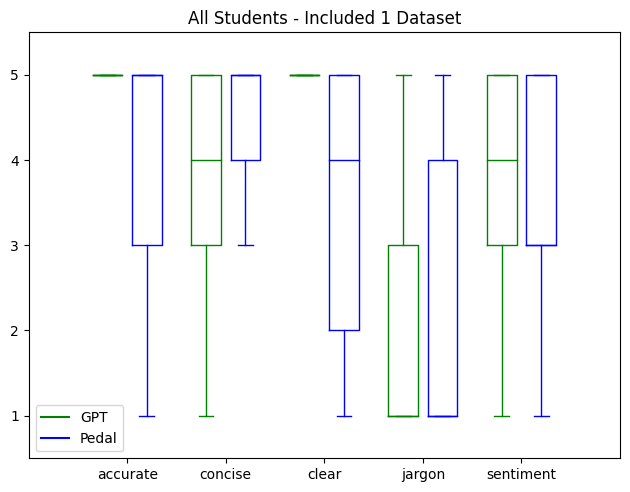

In [155]:
# For subject ids "Girafarig", "Nosepass", and "Beedrill" we should get the average judgements for all 10 judgement points.
# Same for "Liepard", "Nuzleaf", and "Lapras" as well as for "Elgygem", "Darumaka" and "Buizel".
# The three pairs of three here represent the different student performances (so yes we will want them to be grouped).

from matplotlib import pyplot as plt
import numpy as np

students = ('Girafarig', 'Nosepass', 'Beedrill', 'Liepard', 'Nuzleaf', 'Lapras', 'Elgyem', 'Darumaka', 'Buizel')
student_bundles = (
    ('Girafarig', 'Nosepass', 'Beedrill'),
    ('Liepard', 'Nuzleaf', 'Lapras'),
    ('Elgyem', 'Darumaka', 'Buizel')
)


def set_boxplot_color(bp, color: str):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)


def draw_boxplot(title, gpt_values, pedal_values):
    # https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots
    plt.figure()
    bp_gpt = plt.boxplot(gpt_values, positions=np.array(range(len(gpt_values)))*2.0-0.4, sym='', widths=0.6)
    bp_pedal = plt.boxplot(pedal_values, positions=np.array(range(len(pedal_values)))*2.0+0.4, sym='', widths=0.6)
    set_boxplot_color(bp_gpt, 'green')
    set_boxplot_color(bp_pedal, 'blue')
    
    plt.plot([], c='green', label='GPT')
    plt.plot([], c='blue', label='Pedal')
    plt.legend()
    
    plt.xticks(range(0, len(data_fields) * 2, 2), data_fields)
    plt.xlim(-2, len(data_fields) * 2)
    plt.ylim(0.5, 5.5)
    plt.tight_layout()
    
    plt.title(title)
    plt.show()


# todo: included_2
for data_set in ['unincluded', 'included_1']: #data.keys():
    for student_bundle in student_bundles:
        student_plot_data_gpt = [[] for i in range(len(data_fields))]
        student_plot_data_pedal = [[] for i in range(len(data_fields))]
        for i, data_field in enumerate(data_fields):
            for student_name in student_bundle:
                student_plot_data_gpt[i].extend(student_data_aggregate[data_set][student_name][f'instructor_feedback_gpt_{data_field}'])
                student_plot_data_pedal[i].extend(student_data_aggregate[data_set][student_name][f'instructor_feedback_pedal_{data_field}'])
        
        draw_boxplot(f'{", ".join(student_bundle)} - {data_set.capitalize().replace("_", " ")} Dataset', student_plot_data_gpt, student_plot_data_pedal)
    
    student_plot_data_gpt = [[] for i in range(len(data_fields))]
    student_plot_data_pedal = [[] for i in range(len(data_fields))]
    for i, data_field in enumerate(data_fields):
        for student_name in students:
            student_plot_data_gpt[i].extend(student_data_aggregate[data_set][student_name][f'instructor_feedback_gpt_{data_field}'])
            student_plot_data_pedal[i].extend(student_data_aggregate[data_set][student_name][f'instructor_feedback_pedal_{data_field}'])
    
    draw_boxplot(f'All Students - {data_set.capitalize().replace("_", " ")} Dataset', student_plot_data_gpt, student_plot_data_pedal)

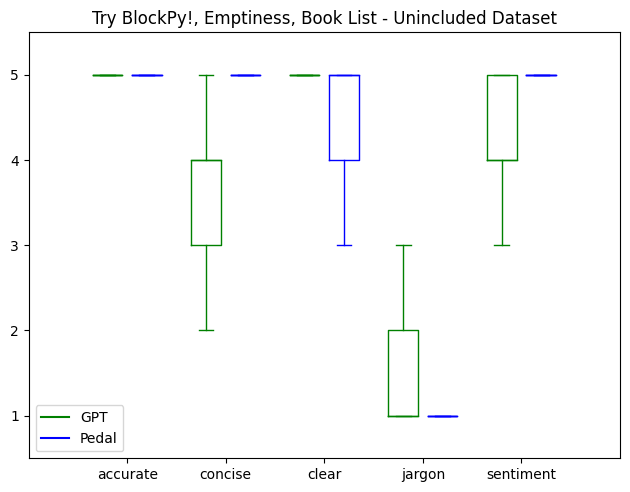

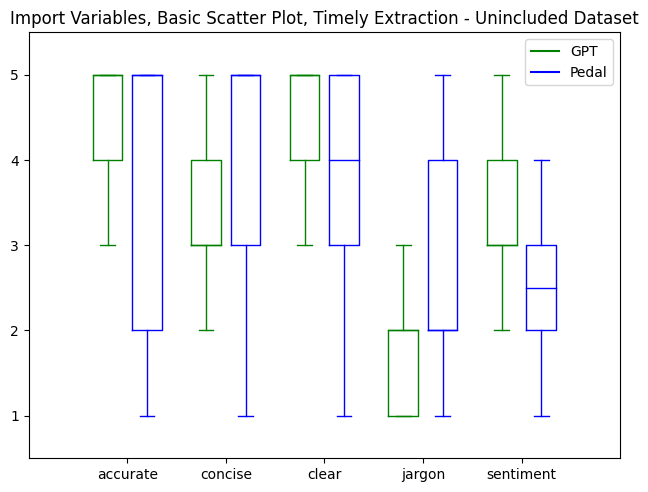

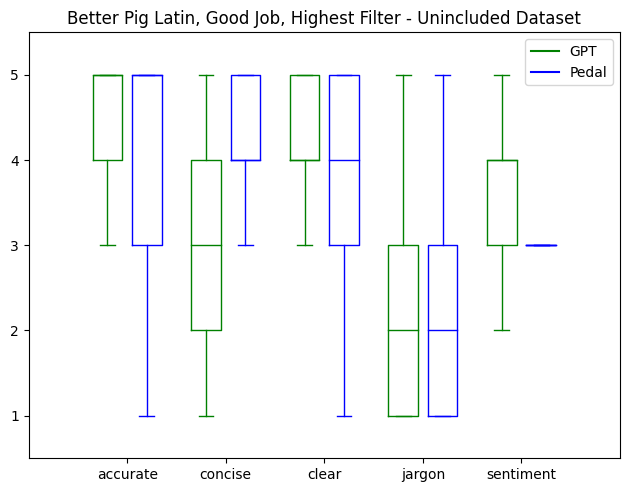

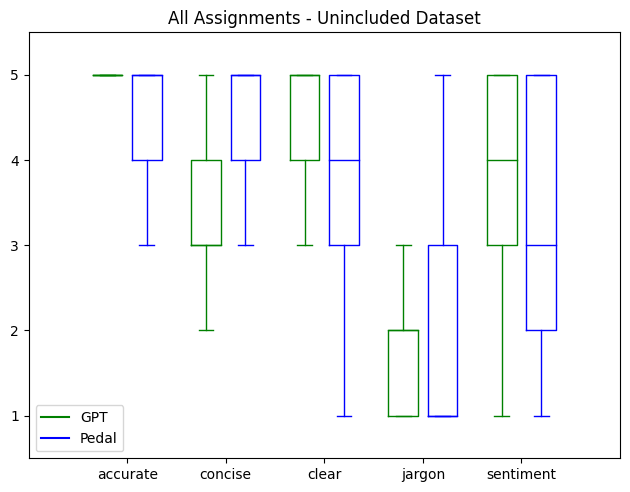

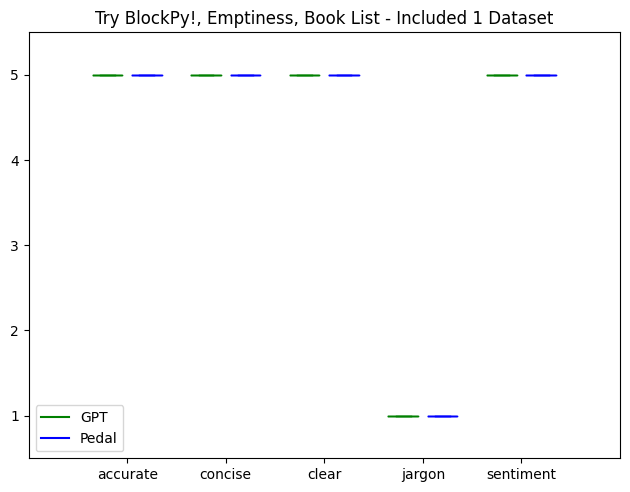

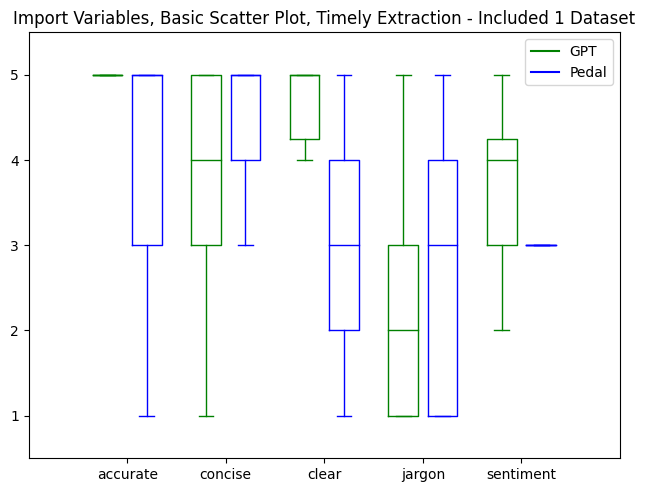

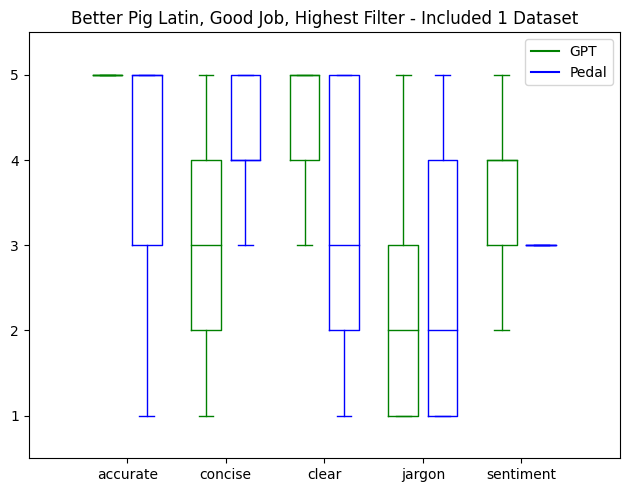

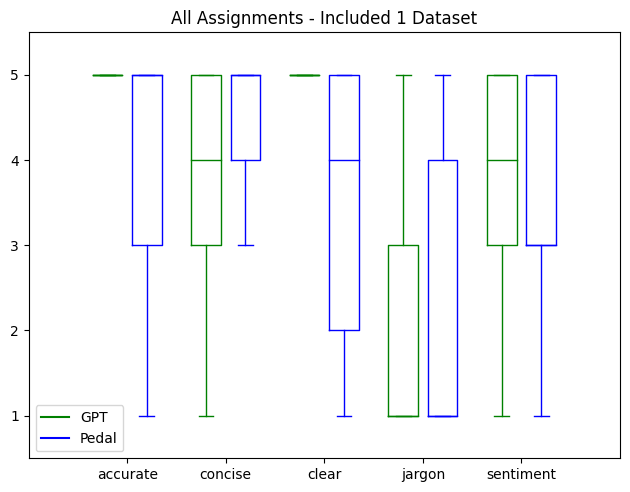

In [156]:
# Additionally, for assignment names "1A2.1) Try BlockPy!", "4B1.3) Emptiness", and "4B1.2) Book List" we should get the average judgements for all 10 judgement points.
# Same for "1B5.1) Import Variables",  "11A1.5) Basic Scatter Plot", and "2B3.1) Timely Extraction" as well as "3B2.2) Better Pig Latin", "8A1.4) Good Job", and "6B2.4) Highest Filter".
# Same grouping here: three assignments per category. We will want to analyze them in such a way.

assignments = {
    'bakery_intro_programs_code_try_blockpy': 'Try BlockPy!',
    'bakery_structures_lists_code_emptiness': 'Emptiness',
    'bakery_structures_lists_code_book_list': 'Book List',
    'bakery_intro_import_code_import_variable': 'Import Variables',
    'bakery_advanced_plotting_code_basic_scatter': 'Basic Scatter Plot',
    'bakery_functions_flow_code_timely_extraction': 'Timely Extraction',
    'bakery_if_patterns_make_pig_latin': 'Better Pig Latin',
    'bakery_nesting_list_dataclasses_code_good_job': 'Good Job',
    'bakery_for_composition_code_highest_filter': 'Highest Filter'
}
assignment_bundles = (
    ('bakery_intro_programs_code_try_blockpy', 'bakery_structures_lists_code_emptiness', 'bakery_structures_lists_code_book_list'),
    ('bakery_intro_import_code_import_variable', 'bakery_advanced_plotting_code_basic_scatter', 'bakery_functions_flow_code_timely_extraction'),
    ('bakery_if_patterns_make_pig_latin', 'bakery_nesting_list_dataclasses_code_good_job', 'bakery_for_composition_code_highest_filter')
)


# todo: included_2
for data_set in ['unincluded', 'included_1']: #data.keys():
    for assignment_bundle in assignment_bundles:
        assignment_plot_data_gpt = [[] for i in range(len(data_fields))]
        assignment_plot_data_pedal = [[] for i in range(len(data_fields))]
        for i, data_field in enumerate(data_fields):
            for assignment_name in assignment_bundle:
                assignment_plot_data_gpt[i].extend(assignment_data_aggregate[data_set][assignment_name][f'instructor_feedback_gpt_{data_field}'])
                assignment_plot_data_pedal[i].extend(assignment_data_aggregate[data_set][assignment_name][f'instructor_feedback_pedal_{data_field}'])
        
        draw_boxplot(f'{", ".join([assignments[i] for i in assignment_bundle])} - {data_set.capitalize().replace("_", " ")} Dataset', assignment_plot_data_gpt, assignment_plot_data_pedal)
    
    assignment_plot_data_gpt = [[] for i in range(len(data_fields))]
    assignment_plot_data_pedal = [[] for i in range(len(data_fields))]
    for i, data_field in enumerate(data_fields):
        for assignment_name in assignments.keys():
            assignment_plot_data_gpt[i].extend(assignment_data_aggregate[data_set][assignment_name][f'instructor_feedback_gpt_{data_field}'])
            assignment_plot_data_pedal[i].extend(assignment_data_aggregate[data_set][assignment_name][f'instructor_feedback_pedal_{data_field}'])

    draw_boxplot(f'All Assignments - {data_set.capitalize().replace("_", " ")} Dataset', assignment_plot_data_gpt, assignment_plot_data_pedal)

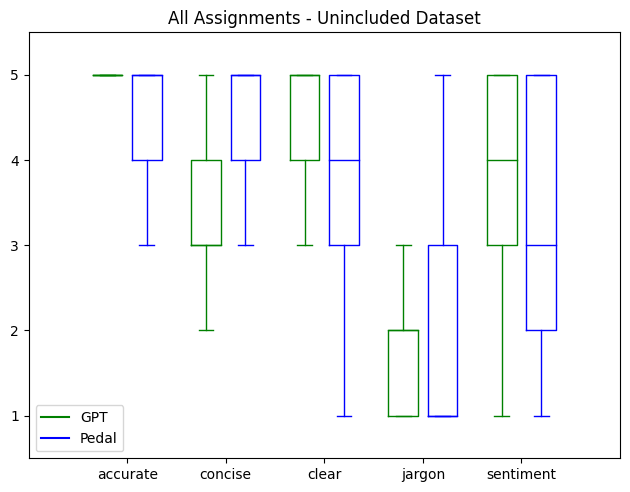

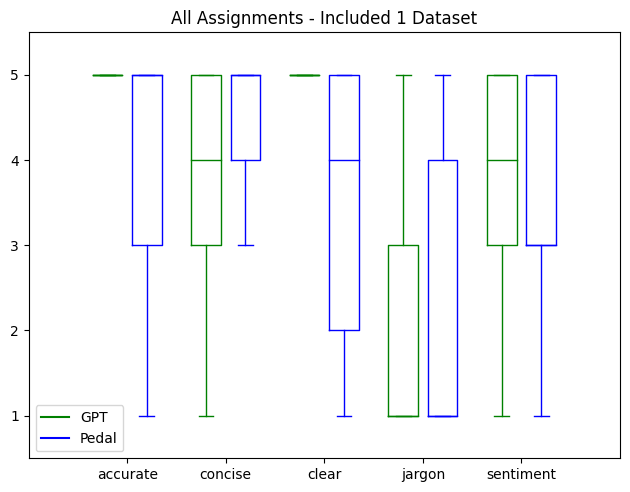

In [157]:
# Lastly, we should get the average for all 10 judgement points across all files.

# todo: included_2
for data_set in ['unincluded', 'included_1']: #data.keys():
    all_plot_data_gpt = [[] for i in range(len(data_fields))]
    all_plot_data_pedal = [[] for i in range(len(data_fields))]
    for i, data_field in enumerate(data_fields):
        all_plot_data_gpt[i].extend(all_data_aggregate[data_set][f'instructor_feedback_gpt_{data_field}'])
        all_plot_data_pedal[i].extend(all_data_aggregate[data_set][f'instructor_feedback_pedal_{data_field}'])

    draw_boxplot(f'All Assignments - {data_set.capitalize().replace("_", " ")} Dataset', all_plot_data_gpt, all_plot_data_pedal)

In [158]:
# need mean, median, stdev, iqr
# Seaborn and pandas can spit that stuff out fairly fast